In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

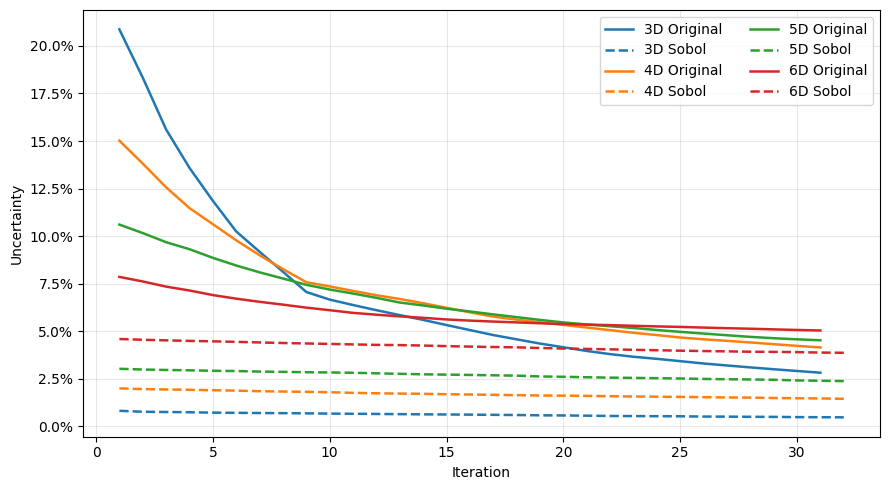

In [2]:
dims = [3, 4, 5, 6]
colors = {
    3: "tab:blue",
    4: "tab:orange",
    5: "tab:green",
    6: "tab:red",
}

def fpath(kind, d):
    return f"LABQ_{kind}_{d}D.csv"

plt.figure(figsize=(9,5))

for d in dims:
    path_o = fpath("original", d)
    if os.path.exists(path_o):
        df_o = pd.read_csv(path_o)
        plt.plot(
            df_o["Step"], df_o["Uncertainty"],
            linestyle="-", linewidth=1.8,
            color=colors[d], label=f"{d}D Original"
        )
    path_s = fpath("Sobol", d)
    if os.path.exists(path_s):
        df_s = pd.read_csv(path_s)
        plt.plot(
            df_s["Step"], df_s["Uncertainty"],
            linestyle="--", linewidth=1.8,
            color=colors[d], label=f"{d}D Sobol"
        )

plt.xlabel("Iteration")
plt.ylabel("Uncertainty")
plt.grid(True, alpha=0.3)
plt.legend(ncol=2)

# 设置 y 轴为百分比
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.tight_layout()
plt.show()

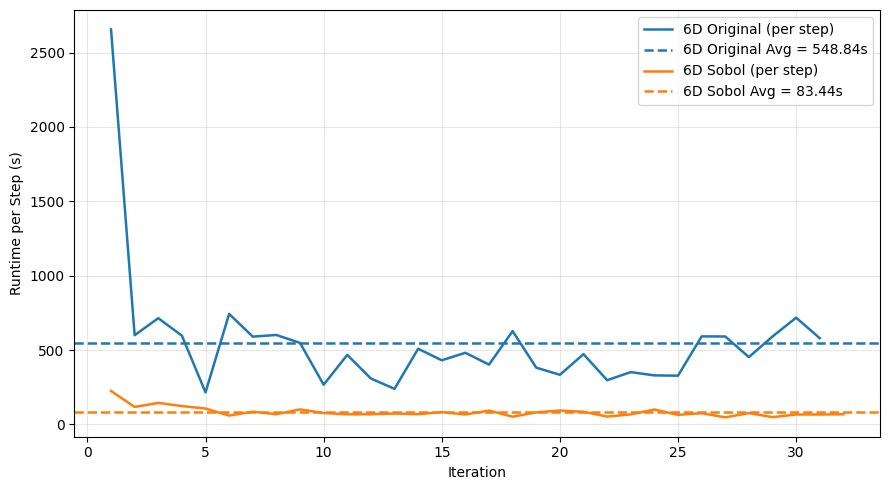

In [3]:
df_o = pd.read_csv("LABQ_original_6D.csv")
df_s = pd.read_csv("LABQ_Sobol_6D.csv")

avg_o = df_o["Time"].mean()
avg_s = df_s["Time"].mean()

plt.figure(figsize=(9,5))

plt.plot(df_o["Step"], df_o["Time"], linestyle="-", color="tab:blue", linewidth=1.8, label="6D Original (per step)")
plt.axhline(y=avg_o, linestyle="--", color="tab:blue", linewidth=1.8, label=f"6D Original Avg = {avg_o:.2f}s")

plt.plot(df_s["Step"], df_s["Time"], linestyle="-", color="tab:orange", linewidth=1.8, label="6D Sobol (per step)")
plt.axhline(y=avg_s, linestyle="--", color="tab:orange", linewidth=1.8, label=f"6D Sobol Avg = {avg_s:.2f}s")


plt.xlabel("Iteration")
plt.ylabel("Runtime per Step (s)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()